<a href="https://colab.research.google.com/github/msafirta/MERFISH_imputed_genes_IC/blob/main/MERFISH_imputed_gene_IC_nicotinic_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Allen Brain Cell Atlas Use Case
This notebook is an example of how to use data from the Allen Brain Cell (ABC) Atas. Code for this notebook comes from [ABC Atlas Access](https://alleninstitute.github.io/abc_atlas_access/intro.html), which features in depth tutorials on ABC Atlas scRNAseq and MERFISH datasets. Use ABC Atlas Access to learn more about each of the datasets. The text following '#' are comments and/or indicate where the code can be edited to look at different brain regions, cell types, etc. This notebook is intended to be used in Google Colab.
## Use Case Description
This code aims to determine gene expression of nicotinic (beta) receptors cells in the inferior colliculus (IC). Using the ABC Atlas, we are looking at spatial transcriptomic mouse data— their genes of interest were not in the orginal 500-gene panel, however, they find their genes in the imputed gene dataset (from scRNAseq data). This dataset is titled "MERFISH-C57BL6J-638850 with Imputed Genes + Reconstructed Coordinates." [Here](https://knowledge.brain-map.org/abcatlas#AQEBSzlKTjIzUDI0S1FDR0s5VTc1QQACSFNZWlBaVzE2NjlVODIxQldZUAADBAE0TVY3SEE1REcyWEpaM1VEOEc5AAIBR2x1dAAAATczR1ZURFhERUdFMjdNMlhKTVQAAgAAAUk5TE5QME8xUk44SzRTTjJHV1kAAgFDQTEAAAFURlFGTE5FUDNWMjIyWTg4QzY0AAIAAAQBAAKCdtVCg3oWcwOCLM2egqrYLgQyTlFUSUU3VEFNUDhQUUFITzRQAAWBr6ZKgemsDoGggUeAktXoBgAHAAAFAgFDaHJuYTcAAAFDaHJtMQAABgEAAkNocm5hNwADfgAAAAQABXUAgC%2BCAIAuBshTBwIjRkZGRkZGAAMABkdFTkUABwAIAgAACFZGT0ZZUEZRR1JLVURRVVozRkYACUxWREJKQVc4Qkk1WVNTMVFVQkcACgALAVRMT0tXQ0w5NVJVMDNEOVBFVEcAAjczR1ZURFhERUdFMjdNMlhKTVQAAwEEAQACIzAwMDAwMAADyAEABQEBAiMwMDAwMDAAA8gBAAAAAgEA) are the cells and genes they are studying in the ABC Atlas.

Goal: plot gene expression of imputed genes Chrnb4 in GABAergic neurons in IC.

In [ ]:
# Install s3fs package
!apt install s3fs

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
s3fs is already the newest version (1.90-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
# Make directory to mount s3 data into
!mkdir -p /data/abc_atlas

In [ ]:
# Mount the s3 bucket using s3fs-fuse
!s3fs -o public_bucket=1 -o default_acl=public-read -o endpoint="us-west-2" allen-brain-cell-atlas /data/abc_atlas

s3fs: MOUNTPOINT directory /data/abc_atlas is not empty. if you are sure this is safe, can use the 'nonempty' mount option.


In [ ]:
# Check that it's mounted
!ls -ltrh /data/abc_atlas

total 35K
drwxr-x--- 1 root root   0 Dec 31  1969 releases
drwxr-x--- 1 root root   0 Dec 31  1969 metadata
drwxr-x--- 1 root root   0 Dec 31  1969 mapmycells
drwxr-x--- 1 root root   0 Dec 31  1969 image_volumes
drwxr-x--- 1 root root   0 Dec 31  1969 expression_matrices
-rw-r----- 1 root root 32K Jun  7  2023 index.html


In [ ]:
# Install abc_atlas_access
%pip install "abc_atlas_access[notebooks] @ git+https://github.com/alleninstitute/abc_atlas_access.git"

  Cloning https://github.com/alleninstitute/abc_atlas_access.git to /tmp/pip-install-kavc38sl/abc-atlas-access_ea46ac6e070f4f299a150fd8390a5603
  Running command git clone --filter=blob:none --quiet https://github.com/alleninstitute/abc_atlas_access.git /tmp/pip-install-kavc38sl/abc-atlas-access_ea46ac6e070f4f299a150fd8390a5603
  Resolved https://github.com/alleninstitute/abc_atlas_access.git to commit 398c9cc557a4b1e75dc68dd3d4965d3ed50367b2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from pathlib import Path
from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [ ]:
download_base = Path('/data/abc_atlas')
abc_cache = AbcProjectCache.from_local_cache(download_base)

abc_cache.current_manifest

/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:470: MissingLocalManifestWarning: This cache directory appears to contain data files, but it has no record of what those files are. Unless running as a LocalCache, files will be re-downloaded.
  warnings.warn(msg, MissingLocalManifestWarning)
/usr/local/lib/python3.11/dist-packages/abc_atlas_access/abc_atlas_cache/cloud_cache.py:1373: ReadOnlyLocalCacheWarning: LocalCache is a read only directory and cannot
                save the last used manifest.
                Current Manifest: releases/20250531/manifest.json
  warnings.warn(


'releases/20250531/manifest.json'

In [ ]:
abc_cache.list_directories

['ASAP-PMDBS-10X',
 'ASAP-PMDBS-taxonomy',
 'Allen-CCF-2020',
 'HMBA-10xMultiome-BG',
 'HMBA-10xMultiome-BG-Aligned',
 'HMBA-BG-taxonomy-CCN20250428',
 'MERFISH-C57BL6J-638850',
 'MERFISH-C57BL6J-638850-CCF',
 'MERFISH-C57BL6J-638850-imputed',
 'MERFISH-C57BL6J-638850-sections',
 'SEAAD',
 'SEAAD-taxonomy',
 'WHB-10Xv3',
 'WHB-taxonomy',
 'WMB-10X',
 'WMB-10XMulti',
 'WMB-10Xv2',
 'WMB-10Xv3',
 'WMB-neighborhoods',
 'WMB-taxonomy',
 'Zeng-Aging-Mouse-10Xv3',
 'Zeng-Aging-Mouse-WMB-taxonomy',
 'Zhuang-ABCA-1',
 'Zhuang-ABCA-1-CCF',
 'Zhuang-ABCA-2',
 'Zhuang-ABCA-2-CCF',
 'Zhuang-ABCA-3',
 'Zhuang-ABCA-3-CCF',
 'Zhuang-ABCA-4',
 'Zhuang-ABCA-4-CCF']

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl

from abc_atlas_access.abc_atlas_cache.abc_project_cache import AbcProjectCache

In [ ]:
# Edit the notebook from here onward
# Load metadata for cell dataset
cell = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850', # To change dataset, enter the directory name from the list above (abc_cache.list_directories). If using imputed genes, use 'MERFISH-C57BL6J-638850'
    file_name='cell_metadata_with_cluster_annotation',
    dtype={"cell_label": str,
           "neurotransmitter": str}
)
cell.set_index('cell_label', inplace=True)

In [ ]:
# filter cells for neurotransmitter type and show first 5 cells in table
NT_cells = cell[cell['neurotransmitter'] == 'GABA'] # 'GABA' change neurotransmitter here
NT_cells.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,neurotransmitter,class,subclass,supertype,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color
cell_label,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,GABA,20 MB GABA,197 SNr Six3 Gaba,0806 SNr Six3 Gaba_1,3464 SNr Six3 Gaba_1,#FF3358,#9EF01A,#7A5C99,#2E995C,#62CC00
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,GABA,05 OB-IMN GABA,039 OB Meis2 Thsd7b Gaba,0143 OB Meis2 Thsd7b Gaba_1,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945


In [ ]:
# get reconstructed x,y,z coordinates for each cell — this is needed anatomical regions. Show first 5 cells in table
reconstructed_coords = abc_cache.get_metadata_dataframe(
    directory='MERFISH-C57BL6J-638850-CCF',
    file_name='reconstructed_coordinates',
    dtype={"cell_label": str}
)
reconstructed_coords.rename(columns={'x': 'x_reconstructed',
                                     'y': 'y_reconstructed',
                                     'z': 'z_reconstructed'}, # Loads 3D Constructed spatial coordinates for cell
                            inplace=True)
reconstructed_coords.set_index('cell_label', inplace=True)
reconstructed_coords.head(5)

,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,
1019171911101460569,7.143894,7.890964,0.8,945
1019171911101550321,4.188673,7.962972,0.8,945
1019171911100841066,6.859447,5.908534,0.8,893
1019171911101400425,3.952014,7.564086,0.8,842
1019171911101380264,2.803546,7.221688,0.8,0


In [ ]:
# add coordinates for each cell to table and show first 5 cells in table
cell_joined = NT_cells.join(reconstructed_coords, how='inner')
cell_joined.head(5) # Merges cell metadata with spatial coordinates

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster,neurotransmitter_color,class_color,subclass_color,supertype_color,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,...,3464 SNr Six3 Gaba_1,#FF3358,#9EF01A,#7A5C99,#2E995C,#62CC00,4.446538,6.117442,5.8,687
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,8.093125,6.110577,6.8,5
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,7.596676,7.463540,9.8,688
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,7.906556,7.408553,9.4,951
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,...,0518 OB Meis2 Thsd7b Gaba_1,#FF3358,#1b4332,#FF99F7,#9F00CC,#994945,7.738014,7.334997,9.8,951


In [ ]:
# get anatomical regions and show first 5 cells in table
parcellation_annotation = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                           file_name='parcellation_to_parcellation_term_membership_acronym')
parcellation_annotation.set_index('parcellation_index', inplace=True)
parcellation_annotation.columns = ['parcellation_%s'% x for x in  parcellation_annotation.columns]
parcellation_annotation.head(5)

,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
parcellation_index,,,,,
0,unassigned,unassigned,unassigned,unassigned,unassigned
1,brain,grey,HY,TMv,TMv
2,brain,grey,Isocortex,SSp-m,SSp-m6b
5,brain,fiber tracts,lfbs,cst,int
6,brain,grey,P,PSV,PSV


In [ ]:
# Load and format color annotations for anatomical regions

#Load a metadata file that maps brain region (parcellation index) to a color
parcellation_color = abc_cache.get_metadata_dataframe(directory='Allen-CCF-2020',
                                                      file_name='parcellation_to_parcellation_term_membership_color')
parcellation_color.set_index('parcellation_index', inplace=True) #Set 'parcellation_index' as row index name
parcellation_color.columns = ['parcellation_%s'% x for x in  parcellation_color.columns] #Rename columns
parcellation_color.head(5) #Show first 5 rows

,parcellation_organ_color,parcellation_category_color,parcellation_division_color,parcellation_structure_color,parcellation_substructure_color
parcellation_index,,,,,
0,#000000,#000000,#000000,#000000,#000000
1,#FFFFFF,#BFDAE3,#E64438,#FF4C3E,#FF4C3E
2,#FFFFFF,#BFDAE3,#70FF71,#188064,#188064
5,#FFFFFF,#CCCCCC,#CCCCCC,#CCCCCC,#CCCCCC
6,#FFFFFF,#BFDAE3,#FF9B88,#FFAE6F,#FFAE6F


In [ ]:
# add anatomical regions to table and show first 5 cells in table
cell_joined = cell_joined.join(parcellation_annotation, on='parcellation_index')
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,...,#62CC00,4.446538,6.117442,5.8,687,brain,fiber tracts,cm,drt,ml
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,...,#994945,8.093125,6.110577,6.8,5,brain,fiber tracts,lfbs,cst,int
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,...,#994945,7.596676,7.463540,9.8,688,brain,grey,OLF,OLF-unassigned,OLF-unassigned
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,...,#994945,7.906556,7.408553,9.4,951,brain,grey,OLF,PIR,PIR
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,...,#994945,7.738014,7.334997,9.8,951,brain,grey,OLF,PIR,PIR


In [ ]:
# Determine how brain region of interest is labeled
structures = cell_joined["parcellation_structure"].unique()
for s in sorted(structures):
    print(s) # copy correct abbreviation for following functions

AAA
ACAd
ACAv
ACB
ADP
AHN
AId
AIp
AIv
AM
AMB
AN
AOB
AON
AP
APN
APr
AQ
ARH
ASO
AT
AUDd
AUDp
AUDpo
AUDv
AV
AVP
AVPV
B
BA
BLA
BMA
BST
CA1
CA2
CA3
CB-unassigned
CEA
CENT
CL
CLA
CLI
COAa
COAp
COPY
CP
CS
CTXsp-unassigned
CU
CUL
CUN
DCO
DEC
DG
DMH
DN
DP
DR
DT
DTN
ECT
ENTl
ENTm
EPd
EPv
EW
Eth
FC
FL
FN
FOTU
FRP
FS
GPe
GPi
GRN
GU
HATA
HPF-unassigned
HY-unassigned
IA
IAM
IC
ICB
IF
IG
IGL
III
IIIn
IIn
ILA
IMD
IP
IPN
IRN
IV
IVn
In
IntG
LA
LAV
LD
LDT
LGd
LGv
LH
LHA
LING
LM
LP
LPO
LRN
LSc
LSr
LSv
LT
MA
MA3
MB-unassigned
MD
ME
MEA
MEPO
MG
MH
MM
MOB
MOp
MOs
MPN
MPO
MPT
MRN
MS
MT
MV
MY-unassigned
NB
NDB
NI
NLL
NLOT
NOD
NOT
NPC
NTB
NTS
OLF-unassigned
OP
ORBl
ORBm
ORBvl
OT
OV
P-unassigned
PA
PAA
PAG
PAL-unassigned
PAR
PARN
PB
PBG
PCG
PCN
PD
PDTg
PERI
PF
PFL
PG
PGRNd
PGRNl
PH
PIL
PIR
PL
PMv
PN
PO
POL
POST
PP
PPN
PPT
PPY
PR
PRE
PRM
PRNc
PRNr
PRP
PS
PST
PSTN
PSV
PT
PVH
PVHd
PVT
PVa
PVi
PVp
PVpo
PYR
Pa4
Pa5
PeF
PoT
ProS
RCH
RE
RL
RM
RN
RPA
RPF
RPO
RR
RSPagl
RSPd
RSPv
RT
SAG
SBPV
SCH
SCO
SCm
SCs
SEZ
SF
SFO
SG


In [ ]:
# filter for cells in anatomical division and show first 5 cells in table
cell_joined[cell_joined["parcellation_structure"]== 'IC']
# 'IC' change anatomical division here, 'parcellation_structure' change anatomical level here
# from ABC Atlas, anatomical division = parcellation_division, anatomical structure = parcellation_structure, anatomical substructure = parcellation_substructure
cell_joined.head(5)

,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,cluster_color,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101400358-4,C57BL6J-638850.33,3155,0.504776,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.441577,6.464796,5.8,...,#62CC00,4.446538,6.117442,5.8,687,brain,fiber tracts,cm,drt,ml
1017092617102560597,C57BL6J-638850.38,1258,0.542498,C57BL6J-638850,C57BL6J-638850,wt/wt,M,8.175661,6.082802,6.8,...,#994945,8.093125,6.110577,6.8,5,brain,fiber tracts,lfbs,cst,int
1104095349102280703,C57BL6J-638850.52,1258,0.527005,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.644348,7.696379,9.8,...,#994945,7.596676,7.463540,9.8,688,brain,grey,OLF,OLF-unassigned,OLF-unassigned
1017155956100650356,C57BL6J-638850.50,1258,0.691000,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.889727,7.462066,9.4,...,#994945,7.906556,7.408553,9.4,951,brain,grey,OLF,PIR,PIR
1104095349102440200-3,C57BL6J-638850.52,1258,0.669169,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.806380,7.547507,9.8,...,#994945,7.738014,7.334997,9.8,951,brain,grey,OLF,PIR,PIR


In [ ]:
# get gene expression values from cell dataset
imputed_h5ad_path = abc_cache.get_data_path('MERFISH-C57BL6J-638850-imputed', 'C57BL6J-638850-imputed/log2')
# change cell dataset here.
adata = anndata.read_h5ad(imputed_h5ad_path, backed='r')
gene_list = ['Chrnb2', 'Chrnb4'] # edit genes here

In [ ]:
# get ensemble IDs of genes of interest
pred = [x in gene_list for x in adata.var.gene_symbol]
gene_filtered = adata.var[pred]
gene_filtered # if a gene is not present here, it is not present in the dataset

,gene_symbol
gene_identifier,
ENSMUSG00000035200,Chrnb4


In [ ]:
# get gene expression values for genes of interest and show first 5 cells in table
gene_subset = adata[:, gene_filtered.index].to_df()
adata.file.close()
del adata

gene_subset.rename(columns=gene_filtered.to_dict()['gene_symbol'], inplace=True)
gene_subset.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


gene_identifier,Chrnb4
cell_label,
1104095349100540743-1,0.003489
1018093345100600265,0.000000
1018135614102090183,0.000000
1104095348100570634,0.000000
1018122109102452991,0.000000


In [ ]:
# add genes of interest to cell table
genes_of_interest = cell_joined.join(gene_subset, on='cell_label', how='inner') #merges gene expression values into cell metadata

In [ ]:
# filter cell table for anatomical region
cell_table = genes_of_interest[genes_of_interest["parcellation_structure"]== 'IC']
# 'IC' change anatomical region here, 'parcellation_structure' change anatomical level here

In [ ]:
# show all metadata for first 5 cells
cell_table.head(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,Chrnb4
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344101450289-1,C57BL6J-638850.15,4167,0.528230,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.884712,3.639677,2.8,...,4.945992,3.535219,2.8,810,brain,grey,MB,IC,ICd,0.0
1018093344100990479-3,C57BL6J-638850.18,4170,0.693629,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.264717,3.023614,3.4,...,6.299144,2.772921,3.4,810,brain,grey,MB,IC,ICd,0.0
1018093344101620738-1,C57BL6J-638850.17,4170,0.690500,C57BL6J-638850,C57BL6J-638850,wt/wt,M,5.776003,2.652793,3.2,...,5.811133,2.867484,3.2,810,brain,grey,MB,IC,ICd,0.0
1018093344102060244-1,C57BL6J-638850.17,3329,0.609328,C57BL6J-638850,C57BL6J-638850,wt/wt,M,7.081130,2.788188,3.2,...,7.069739,2.981044,3.2,818,brain,grey,MB,IC,ICe,0.0
1017092617201390347,C57BL6J-638850.25,3329,0.506157,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.815195,3.860187,4.0,...,3.765888,3.842163,4.0,818,brain,grey,MB,IC,ICe,0.0


In [ ]:
# Filtering for specific 'IC' cells and checking unique brain sections
ic_cells = cell_joined[cell_joined["parcellation_structure"] == "IC"] #Change brain region here
ic_cells["brain_section_label"].unique()
ic_cells["brain_section_label"].value_counts() #Choosing section with the most cells


,count
brain_section_label,
C57BL6J-638850.19,815
C57BL6J-638850.17,710
C57BL6J-638850.16,631
C57BL6J-638850.18,619
C57BL6J-638850.24,527
C57BL6J-638850.15,240
C57BL6J-638850.25,184
C57BL6J-638850.26,110
C57BL6J-638850.27,15


In [ ]:
# Filter data by specific brain section
use_section_filter = True # change "False" to "True" if you want to filter for a specific brain section. Leave "False" if you do NOT want to filter.
if use_section_filter:
  cell_table = cell_table[cell_table["brain_section_label"] == "C57BL6J-638850.19"] # "C57BL6J-638850.19" edit brain section filter here (choose most cell count from prev)
else:
  print("Brain section filter not used.")

cell_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,brain_section_label,cluster_alias,average_correlation_score,feature_matrix_label,donor_label,donor_genotype,donor_sex,x,y,z,...,x_reconstructed,y_reconstructed,z_reconstructed,parcellation_index,parcellation_organ,parcellation_category,parcellation_division,parcellation_structure,parcellation_substructure,Chrnb4
cell_label,,,,,,,,,,,,,,,,,,,,,
1018093344201690222,C57BL6J-638850.19,3144,0.533952,C57BL6J-638850,C57BL6J-638850,wt/wt,M,4.415714,3.916725,3.6,...,4.345337,4.011941,3.6,810,brain,grey,MB,IC,ICd,0.000000
1018093344101840434-5,C57BL6J-638850.19,3329,0.528428,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.848218,3.647838,3.6,...,3.729532,3.752275,3.6,818,brain,grey,MB,IC,ICe,0.000000
1018093344101830402-4,C57BL6J-638850.19,3329,0.577765,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.982285,3.319043,3.6,...,3.890034,3.433788,3.6,818,brain,grey,MB,IC,ICe,0.000000
1018093344201060174,C57BL6J-638850.19,3329,0.584181,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.651614,2.751159,3.6,...,6.748711,2.899553,3.6,818,brain,grey,MB,IC,ICe,0.000000
1018093344200920518,C57BL6J-638850.19,3330,0.512248,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.761671,3.471980,3.6,...,6.879066,3.573453,3.6,801,brain,grey,MB,IC,ICc,0.038788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018093344101830569-3,C57BL6J-638850.19,3562,0.708108,C57BL6J-638850,C57BL6J-638850,wt/wt,M,3.827300,3.546396,3.6,...,3.710296,3.657977,3.6,818,brain,grey,MB,IC,ICe,0.025574
1018093344101220371-3,C57BL6J-638850.19,3563,0.640145,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.006463,3.070311,3.6,...,6.054450,3.184221,3.6,810,brain,grey,MB,IC,ICd,0.655273
1018093344101220227-4,C57BL6J-638850.19,3568,0.706548,C57BL6J-638850,C57BL6J-638850,wt/wt,M,6.078690,3.173500,3.6,...,6.133892,3.284530,3.6,810,brain,grey,MB,IC,ICd,1.806641


In [ ]:
# just show gene expression values from previous table for first 5 cells.
# Double check number of cells in table with expected number in ABC Atlas.
gene_table = cell_table[['Chrnb4']] # edit genes of interest here
gene_table

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Chrnb4
cell_label,
1018093344201690222,0.000000
1018093344101840434-5,0.000000
1018093344101830402-4,0.000000
1018093344201060174,0.000000
1018093344200920518,0.038788
...,...
1018093344101830569-3,0.025574
1018093344101220371-3,0.655273
1018093344101220227-4,1.806641


In [ ]:
# save gene expression table as csv. saved file will appear in 'files' tab on the left sidebar
gene_table.to_csv('nicotnic_beta_gene_table.csv')


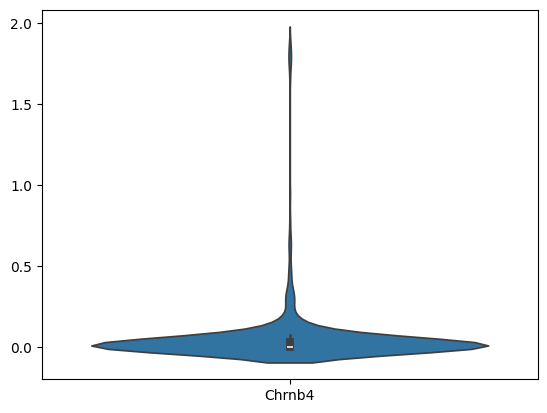

In [ ]:
# create violin plot of gene table

import seaborn as sns

sns.violinplot(data=gene_table)
plt.show()


# (MS) ADDITIONAL FUNCTIONS

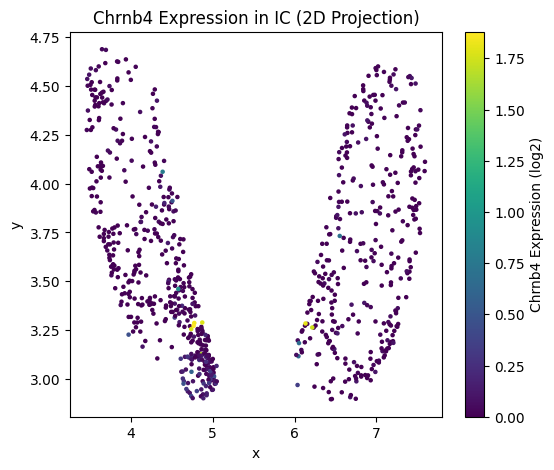

In [ ]:
# 2D spatial plot (Chrnb4)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sc = plt.scatter(
    cell_table['x_reconstructed'],
    cell_table['y_reconstructed'],
    c=cell_table['Chrnb4'], # Edit to match gene
    cmap='viridis',
    s=5
)
plt.colorbar(sc, label='Chrnb4 Expression (log2)') # Edit
plt.xlabel('x')
plt.ylabel('y')
plt.title('Chrnb4 Expression in IC (2D Projection)') # Edit
plt.show()

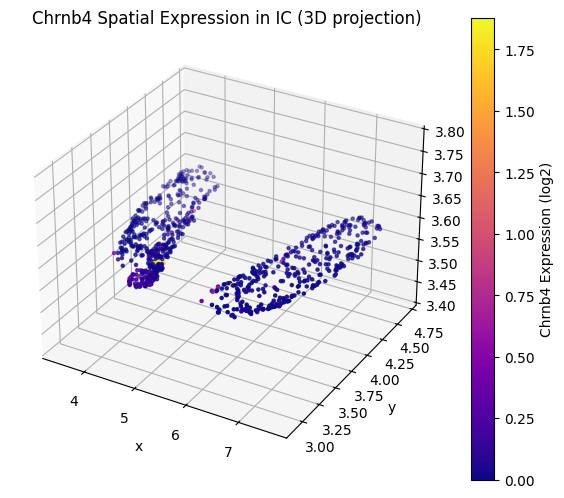

In [ ]:
# 3D Spatial Plot (Chrnb4)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(
    cell_table['x_reconstructed'],
    cell_table['y_reconstructed'],
    cell_table['z_reconstructed'],
    c=cell_table['Chrnb4'], #Edit
    cmap='plasma',
    s=5
)
fig.colorbar(p, label='Chrnb4 Expression (log2)') #Edit
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Chrnb4 Spatial Expression in IC (3D projection)') #Edit
plt.show()

Number of IC cells: 815
All genes available.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


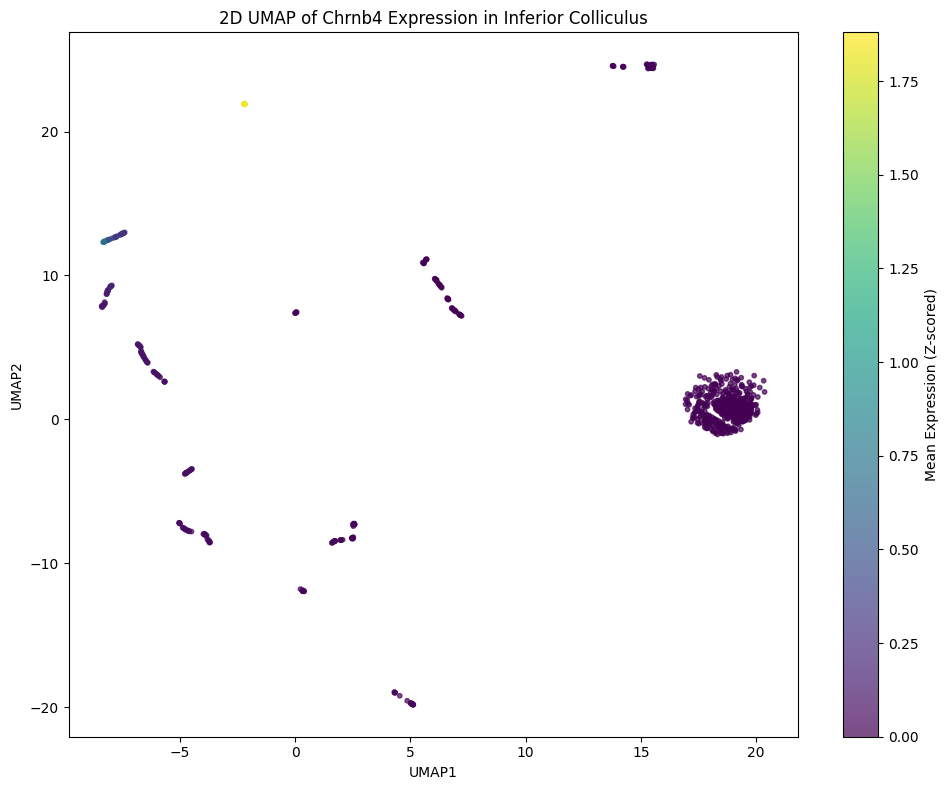

In [ ]:
# UMAP Co-Expression

# Required libraries
import pandas as pd
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Define region and genes of interest
target_region = 'IC'  # Use exact name from dataset
genes_of_interest = ['Chrnb4'] # Edit

# Step 2: Filter cells for the IC
ic_cells = cell_table[cell_table['parcellation_structure'] == target_region].copy()
print(f"Number of IC cells: {ic_cells.shape[0]}")

# Step 3: Check which genes are available
available_genes = [g for g in genes_of_interest if g in ic_cells.columns]
missing_genes = [g for g in genes_of_interest if g not in ic_cells.columns]

if missing_genes:
    print(f"Missing genes: {missing_genes}")
else:
    print("All genes available.")

# Step 4: Extract expression data and normalize
gene_data = ic_cells[available_genes].fillna(0)
gene_data_scaled = StandardScaler().fit_transform(gene_data)

# Step 5: Run UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embedding = reducer.fit_transform(gene_data_scaled)

# Step 6: Prepare UMAP DataFrame
umap_df = pd.DataFrame(umap_embedding, columns=['UMAP1', 'UMAP2'])
umap_df[available_genes] = gene_data.values  # attach gene expression

# Step 7: Plot co-expression (mean) across all 4 genes
umap_df['mean_expression'] = umap_df[available_genes].mean(axis=1)

# Step 8: Plot UMAP with color representing co-expression
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    umap_df['UMAP1'], umap_df['UMAP2'],
    c=umap_df['mean_expression'],
    cmap='viridis',
    s=10,
    alpha=0.7
)
plt.title("2D UMAP of Chrnb4 Expression in Inferior Colliculus")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
cbar = plt.colorbar(scatter)
cbar.set_label("Mean Expression (Z-scored)")

plt.tight_layout()
plt.show()